# Testes com extração NCM.xls
Extração realizada no DW, consulta Dashboard Laudos NCM
DashBoard Laudos - Estatistica NCM

{ANO REGIS}=2016:2016, 2017:2017, 2018:2018 E {PESO LIQ MERC IMP} >= 100000


In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
caminho = os.path.join('..', 'app', 'datasources')
for name in os.listdir(caminho):
    if 'xls' in name: print(name)

NCM.xlsx
valor7.xlsx
valor12.xlsx


In [44]:
df_ncm = pd.read_excel(os.path.join(caminho, 'NCM.xlsx'), header=4)
df_ncm['PESO LIQ MERC IMP POR'] = df_ncm['PESO LIQ MERC IMP'] / df_ncm['PESO LIQ MERC IMP'].sum() # Converter para porcentagem
df_ncm['COD PAIS ORIG DEST'] = pd.to_numeric(df_ncm['COD PAIS ORIG DEST'], errors='coerce', downcast='unsigned')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

/home/ivan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


In [23]:
df_ncm.head()

,COD PAIS ORIG DEST,PAIS ORIGEM DESTINO,COD CAPIT NCM,CAPITULO NCM,MES REGIS,Métrica,PESO LIQ MERC IMP
0,17.00,Albânia,72,"Ferro fundido, ferro e aço",Nov 2016,nan,0.00
1,17.00,Albânia,72,"Ferro fundido, ferro e aço",Dez 2016,nan,0.00
2,17.00,Albânia,76,Alumínio e suas obras,Out 2017,nan,0.00
3,23.00,Alemanha,3,"Peixes e crustáceos, moluscos e outros inverte...",Out 2016,nan,0.00
4,23.00,Alemanha,5,"Outros produtos de origem animal, não especifi...",Jan 2016,nan,0.00


In [45]:
df_pesopais = df_ncm.groupby(
            ['COD PAIS ORIG DEST', 'PAIS ORIGEM DESTINO'], as_index=False
        )['PESO LIQ MERC IMP POR'].sum()
df_pesopais.columns = ['codpais', 'PaisOrigem', 'pesototal']


In [46]:
df_pesopais.head()

,codpais,PaisOrigem,pesototal
0,17.00,Albânia,0.00
1,23.00,Alemanha,0.02
2,40.00,Angola,0.00
3,47.00,Antilhas Holandesas,0.00
4,53.00,Arábia Saudita,0.03


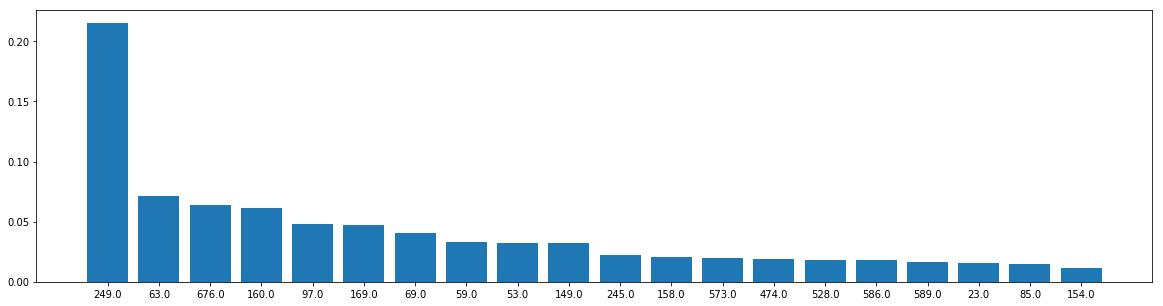

In [47]:
%matplotlib inline
plt.figure(figsize=(20,5))
df_pesopais = df_pesopais.sort_values(by='pesototal', ascending=False)
x = df_pesopais['pesototal'][:20]
labels = df_pesopais['codpais'][:20]
plt.bar(range(len(x)), x) #, labels)
plt.xticks(range(len(x)), labels)
plt.show()

In [49]:
df_pesoncm = df_ncm.groupby(
            ['COD CAPIT NCM', 'CAPITULO NCM'], as_index=False
        )['PESO LIQ MERC IMP POR'].sum()
df_pesoncm.columns = ['codcapncm', 'CapituloNCM', 'pesototal']

In [50]:
df_pesoncm.head()

,codcapncm,CapituloNCM,pesototal
0,1,Animais vivos,0.00
1,2,"Carnes e miudezas, comestíveis",0.00
2,3,"Peixes e crustáceos, moluscos e outros inverte...",0.00
3,4,Leite e lacticínios; ovos de aves; mel natural...,0.00
4,5,"Outros produtos de origem animal, não especifi...",0.00


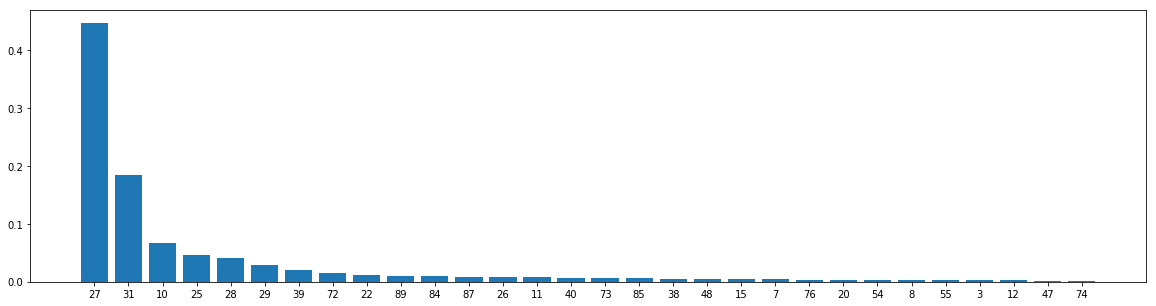

In [51]:
%matplotlib inline
plt.figure(figsize=(20,5))
df_pesoncm = df_pesoncm.sort_values(by='pesototal', ascending=False)
x = df_pesoncm['pesototal'][:30]
labels = df_pesoncm['codcapncm'][:30]
plt.bar(range(len(x)), x) #, labels)
plt.xticks(range(len(x)), labels)
plt.show()

In [52]:
import MySQLdb
db = MySQLdb.connect('localhost', 'root', 'ivan1234')

# Laudos: qtde por país
sql = 'SELECT origemid as codpais, COUNT(*) as total ' + \
    'FROM LAUDOS.itenssat ' + \
    'GROUP BY origemid ' + \
    'ORDER BY total DESC; '
df_qtdelaudospais = pd.read_sql(sql, db)
df_pais_x_peso = df_qtdelaudospais.merge(df_pesopais, on='codpais')

In [38]:
df_pais_x_peso = df_pais_x_peso.sort_values(by='pesototal', ascending=False)
df_pais_x_peso.head(10)

,codpais,total,PaisOrigem,pesototal
0,249.00,154,Estados Unidos,0.22
22,63.00,2,Argentina,0.07
39,160.00,1,China,0.06
6,97.00,12,Bolívia,0.05
38,169.00,1,Colômbia,0.05
31,69.00,1,Austrália,0.04
21,59.00,2,Argélia,0.03
5,53.00,42,Arábia Saudita,0.03
3,149.00,51,Canadá,0.03
7,158.00,11,Chile,0.02


In [17]:
df_qtdelaudospais.head()

,codpais,total
0,95.00,2523
1,21.00,1651
2,41.00,1174
3,43.00,764
4,138.00,421


In [55]:
df_pesoncmpais = df_ncm.groupby(
            ['COD PAIS ORIG DEST',
             'PAIS ORIGEM DESTINO',
             'COD CAPIT NCM',
             'CAPITULO NCM'], as_index=False
        )['PESO LIQ MERC IMP'].sum()
df_pesoncmpais.columns = ['codpais', 'PaisOrigem', 'codcapncm', 'CapituloNCM', 'pesototal']
df_pesoncmpais = df_pesoncmpais.sort_values(by='pesototal', ascending=False)


In [56]:
df_pesoncmpais.head()

,codpais,PaisOrigem,codcapncm,CapituloNCM,pesototal
757,249.00,Estados Unidos,27,"Combust., óleos minerais, mat. betum., ceras",53052104119.76
235,97.00,Bolívia,27,"Combust., óleos minerais, mat. betum., ceras",17590805829.73
82,63.00,Argentina,10,Cereais,16419840943.82
514,169.00,Colômbia,27,"Combust., óleos minerais, mat. betum., ceras",16411744661.73
133,69.00,Austrália,27,"Combust., óleos minerais, mat. betum., ceras",14973757606.72
